In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


FASHION MNIST CNN ANALYSIS Lable Description


0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankie boot



In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
# Load the fashion-mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

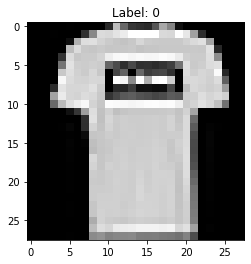

In [ ]:
plt.imshow(np.reshape(x_train[1], (28,28)), cmap='gray')
plt.title('Label: %i' %y_train[1])
plt.show()

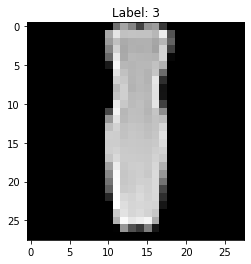

In [ ]:
plt.imshow(np.reshape(x_train[59], (28,28)), cmap='gray')
plt.title('Label: %i' %y_train[59])
plt.show()

In [ ]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Define Labels
fashion_labels = ['T-shirt/top'
,'Trouser'
,'Pullover'
,'Dress'
,'Coat'
,'Sandal'
,'Shirt'
,'Sneaker'
,'Bag'
,'Ankie boot']


**Processing Image**

In [ ]:
# Image pixel normalization
x_train = x_train.astype('float32')/255

In [ ]:
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

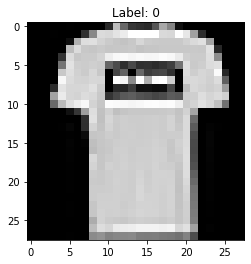

In [ ]:
plt.imshow(np.reshape(x_train[1], (28,28)), cmap='gray')
plt.title('Label: %i' %y_train[1])
plt.show()

**Image Transformation**

In [ ]:
image_height = 28
image_width = 28

# Grayscale image with num_channels (Rank =1)
num_channels =1

# Reshaping of Image = (60000, 28, 28, 1)
train_digits = np.reshape(x_train, newshape=(60000, image_height, image_width, num_channels))

In [ ]:
test_digits = np.reshape(x_test, newshape=(10000, image_height, image_width, num_channels))

**Target O/P to categorical O/P**

In [ ]:
# 0-9 num_classes = 10
# 7 = [0,0,0,0,0,0,0,1,0,0]
# 5 = [0,0,0,0,0,1,0,0,0,0]
from keras.utils import to_categorical
num_classes = 10
train_labels_class = to_categorical(y_train, num_classes)

In [ ]:
test_labels_class = to_categorical(y_test, num_classes)

In [ ]:
train_labels_class

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**CNN Model**

In [ ]:
from keras.models import Sequential
# Conv1D = CSV (ECG, Audio, Transmission Signals, CSV file), Conv2D & Conv3D (Image)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam 

In [ ]:
def build_model():
  model = Sequential()

  # Layer - I (Padding = 'same' --> zero padding)
  model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', 
                   input_shape = (image_height, image_width, num_channels)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Flatten Matrix
  model.add(Flatten())

  # Fully Connected Layer
  model.add(Dense(units=128, activation='relu'))

  # Output Layer
  model.add(Dense(units=10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # categorical_crossentropy - used for multiclass classification
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model
  


In [ ]:
train_digits.shape

(60000, 28, 28, 1)

In [ ]:
model = build_model()

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
history = model.fit(train_digits, 
train_labels_class, epochs=11, batch_size=64, validation_split=0.1)

Epoch 1/11
844/844 [==============================] - 4s 5ms/step - loss: 0.5056 - accuracy: 0.8176 - val_loss: 0.3520 - val_accuracy: 0.8725
Epoch 2/11
844/844 [==============================] - 4s 5ms/step - loss: 0.3122 - accuracy: 0.8864 - val_loss: 0.2844 - val_accuracy: 0.8958
Epoch 3/11
844/844 [==============================] - 4s 5ms/step - loss: 0.2662 - accuracy: 0.9026 - val_loss: 0.2513 - val_accuracy: 0.9067
Epoch 4/11
844/844 [==============================] - 4s 5ms/step - loss: 0.2370 - accuracy: 0.9138 - val_loss: 0.2468 - val_accuracy: 0.9072
Epoch 5/11
844/844 [==============================] - 4s 5ms/step - loss: 0.2137 - accuracy: 0.9209 - val_loss: 0.2620 - val_accuracy: 0.9082
Epoch 6/11
844/844 [==============================] - 4s 5ms/step - loss: 0.1961 - accuracy: 0.9283 - val_loss: 0.2308 - val_accuracy: 0.9133
Epoch 7/11
844/844 [==============================] - 4s 5ms/step - loss: 0.1749 - accuracy: 0.9356 - val_loss: 0.2428 - val_accuracy: 0.9133
Epoch 

In [ ]:
model.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9105


[0.26495566964149475, 0.9104999899864197]

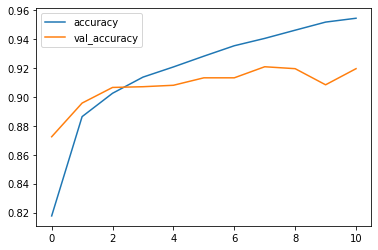

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

**CNN with dropout**
To avoid overfitting of model


In [ ]:
from keras.layers import Dropout

In [ ]:
def build_model():
  model2 = Sequential()

  # Layer - I (Padding = 'same' --> zero padding)
  model2.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', 
                   input_shape = (image_height, image_width, num_channels)))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  model2.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  model2.add(Conv2D(filters = 128, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.25))

  # Flatten Matrix
  model2.add(Flatten())
  
  # Fully Connected Layer
  model2.add(Dense(units=128, activation='relu'))
  model2.add(Dropout(0.30))

  # Output Layer
  model2.add(Dense(units=10, activation='softmax'))

  # Model Compile
  optimizers = Adam(learning_rate=0.001)

  # categorical_crossentropy - used for multiclass classification
  model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
  return model2
  

In [ ]:

model2 = build_model()
  

In [ ]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
results = model2.fit(train_digits, train_labels_class, epochs=50, batch_size=64, validation_split=0.1)
  

Epoch 1/50
844/844 [==============================] - 5s 6ms/step - loss: 0.6460 - accuracy: 0.7591 - val_loss: 0.3697 - val_accuracy: 0.8627
Epoch 2/50
844/844 [==============================] - 5s 5ms/step - loss: 0.3990 - accuracy: 0.8551 - val_loss: 0.3194 - val_accuracy: 0.8813
Epoch 3/50
844/844 [==============================] - 5s 5ms/step - loss: 0.3440 - accuracy: 0.8734 - val_loss: 0.2807 - val_accuracy: 0.8933
Epoch 4/50
844/844 [==============================] - 5s 5ms/step - loss: 0.3126 - accuracy: 0.8863 - val_loss: 0.2523 - val_accuracy: 0.9032
Epoch 5/50
844/844 [==============================] - 5s 5ms/step - loss: 0.2919 - accuracy: 0.8941 - val_loss: 0.2539 - val_accuracy: 0.9062
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2765 - accuracy: 0.8988 - val_loss: 0.2450 - val_accuracy: 0.9088
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2644 - accuracy: 0.9037 - val_loss: 0.2288 - val_accuracy: 0.9187
Epoch 

In [ ]:

model2.evaluate(test_digits, test_labels_class)
  

313/313 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9295


[0.21583549678325653, 0.9294999837875366]

In [ ]:

pd.DataFrame(results.history) 
  

,loss,accuracy,val_loss,val_accuracy
0,0.646019,0.759093,0.369715,0.862667
1,0.398957,0.855111,0.319392,0.881333
2,0.344020,0.873370,0.280699,0.893333
3,0.312597,0.886315,0.252283,0.903167
4,0.291908,0.894074,0.253872,0.906167
5,0.276463,0.898796,0.245015,0.908833
6,0.264353,0.903667,0.228765,0.918667
7,0.252411,0.906852,0.217927,0.918833
8,0.244843,0.908704,0.217913,0.917500
9,0.235896,0.912259,0.220026,0.916000


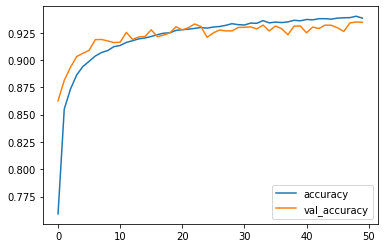

In [ ]:

pd.DataFrame(results.history)[['accuracy',  'val_accuracy']].plot()
  

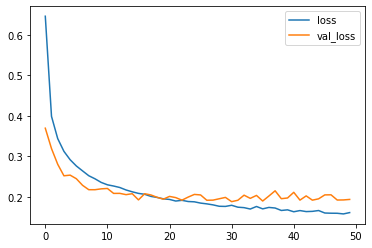

In [ ]:
pd.DataFrame(results.history)[['loss',  'val_loss']].plot()

In [ ]:
predictions = model2.predict(test_digits)

In [ ]:
# Converts categorical o/p into integer o/p (argmax)
yhat = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, yhat)

array([[887,   0,  17,  10,   1,   1,  81,   0,   3,   0],
       [  0, 986,   0,   9,   1,   0,   2,   0,   2,   0],
       [ 21,   1, 879,   5,  60,   0,  34,   0,   0,   0],
       [ 11,   4,  10, 922,  27,   0,  25,   0,   1,   0],
       [  1,   0,  30,  15, 913,   0,  41,   0,   0,   0],
       [  0,   0,   0,   0,   0, 988,   0,   8,   1,   3],
       [ 83,   3,  46,  19,  60,   0, 784,   0,   5,   0],
       [  0,   0,   0,   0,   0,   3,   0, 981,   0,  16],
       [  3,   1,   3,   2,   1,   2,   2,   1, 985,   0],
       [  1,   0,   0,   0,   0,   4,   0,  25,   0, 970]])

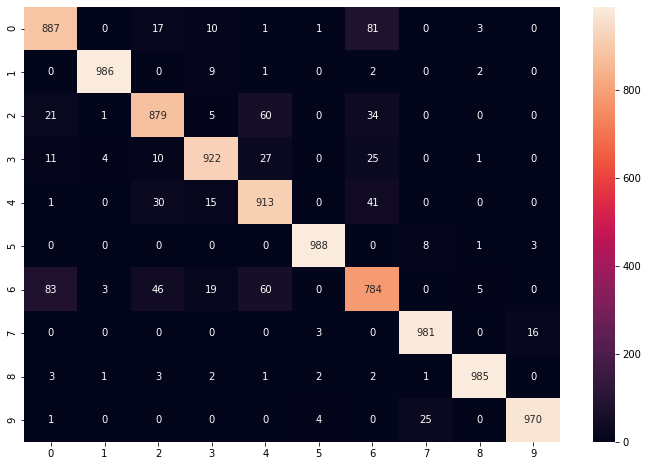

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='0.0f')

In [ ]:
yhat = np.argmax(model2.predict(np.reshape(test_digits[4],(1,28,28,1))))

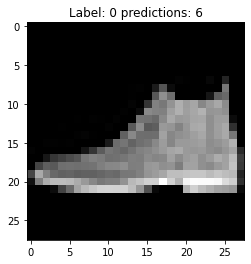

In [ ]:
plt.imshow(np.reshape(test_digits[0], (28,28)), cmap='gray')
plt.title('Label: %i predictions: %i' %(y_train[1], yhat))
plt.show()

**Make Predictions with new Image**

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/T-Shirt Sample.png', 0)

In [ ]:
img.shape

(974, 860)

In [ ]:
test_digits.shape

(10000, 28, 28, 1)

In [ ]:
img_data = cv2.resize(img, (28,28))

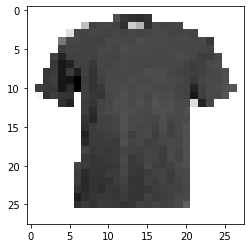

In [ ]:
plt.imshow(img_data, cmap='gray')

In [ ]:
img_data = cv2.bitwise_not(img_data)

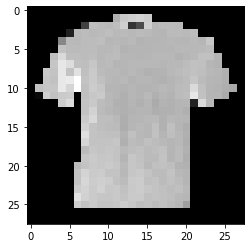

In [ ]:
plt.imshow(img_data, cmap='gray')

In [ ]:
img_new = np.reshape(img_data, (1, image_height,image_width, num_channels))

In [ ]:
img_new.shape

(1, 28, 28, 1)

In [ ]:
model.predict(img_new)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(img_new))

0